# Problem Statement - Credit Card Defualt Status
# Predictive Modeling - Linear Discriminant Analysis

In [2]:

import pandas as pd  
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale

# Set the working directory

# Import Excel file

Load the Data file into Python DataFrame using pandas read_csv method

Ensure that data set loaded do not have any unicode character 

In [3]:
data_df = pd.read_csv("Holiday_Package.csv")


# View Top 10 rows

head function is used to view the top records. The number records to be view need to be  given in the parenthesis.

In [4]:
data_df.head(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


# Some more basic commands

tail function is used to view the last records. The number records to be view need to be given in the parenthesis.

In [5]:
data_df.tail(20)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
852,853,yes,46747,41,5,0,2,yes
853,854,no,38536,32,12,1,0,yes
854,855,no,27332,25,11,1,0,yes
855,856,yes,106302,47,13,0,0,yes
856,857,yes,49318,31,16,2,0,yes
857,858,no,56718,33,14,0,2,yes
858,859,yes,32206,28,5,0,2,yes
859,860,yes,47837,38,11,0,0,yes
860,861,yes,37380,34,9,1,1,yes
861,862,yes,35191,33,6,0,2,yes


In [7]:
data_df.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


In [8]:
data_df.dtypes

Unnamed: 0            int64
Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [48]:
type(data_df)

pandas.core.frame.DataFrame

# Check for missing values

In [9]:
data_df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

No Missing values

In [10]:
data_df.shape

(872, 8)

# Find out unique values in each categorical column



In [11]:
data_df['Holliday_Package'].unique()

array(['no', 'yes'], dtype=object)

In [12]:
data_df['foreign'].unique()

array(['no', 'yes'], dtype=object)

In [13]:
data_df.dtypes

Unnamed: 0            int64
Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

# Count of Default and No Default in the Target Column

In [14]:
data_df['Holliday_Package'].value_counts()

no     471
yes    401
Name: Holliday_Package, dtype: int64

# Univariate Plots


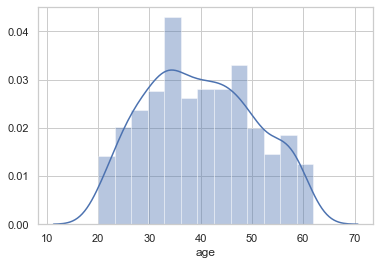

In [15]:
sns.distplot(data_df['age'])
plt.show() 

# Bivariate Analysis 


Bivariate shown below is only as a sample.. Reader is adviced to perform complete data exploration process

/Users/swathi/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


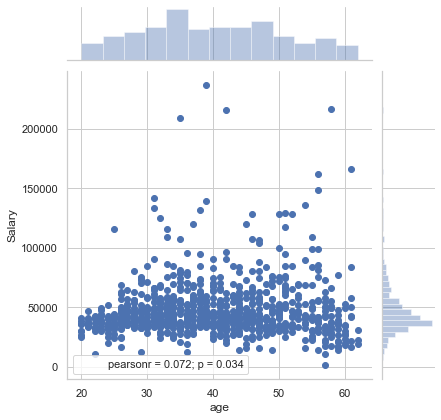

In [18]:
sns.jointplot(data_df['age'], data_df['Salary']).annotate(stats.pearsonr) 

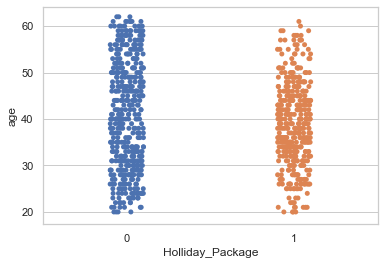

In [36]:
sns.stripplot(data_df['Holliday_Package'], data_df['age']) ### Concentration of observations

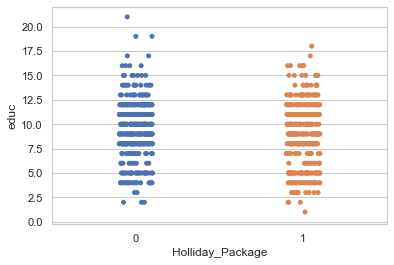

In [37]:
sns.stripplot(data_df['Holliday_Package'], data_df['educ']) ### Concentration of observations

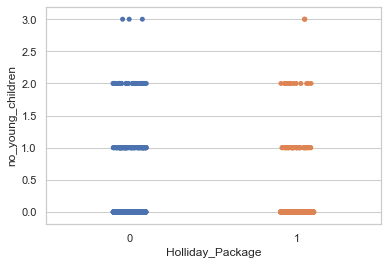

In [40]:
sns.stripplot(data_df['Holliday_Package'], data_df['no_young_children']) ### Concentration of observations

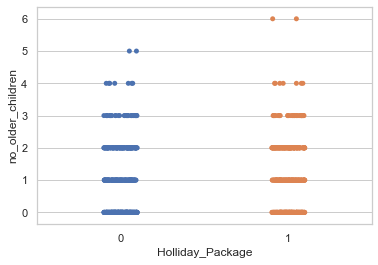

In [41]:
sns.stripplot(data_df['Holliday_Package'], data_df['no_older_children']) ### Concentration of observations

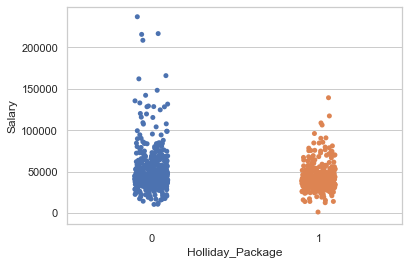

In [42]:
sns.stripplot(data_df['Holliday_Package'], data_df['Salary']) ### Concentration of observations

Age Betwee 30 and 50 choose holiday package

# Find the Distribution of Dependent Variable Categories


Text(0, 0.5, 'Holliday_Package')

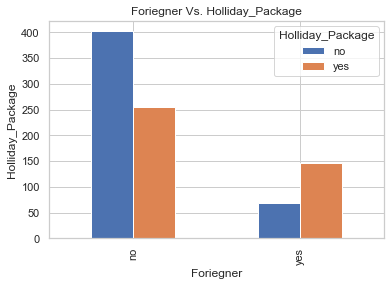

In [22]:
pd.crosstab(data_df.foreign,data_df.Holliday_Package).plot(kind='bar')
plt.title('Foriegner Vs. Holliday_Package')
plt.xlabel('Foriegner')
plt.ylabel('Holliday_Package')


In [23]:
data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


# Convert Object Feature types for Linear Discriminant Analysis

In [26]:
for feature in data_df.columns: 
    if data_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data_df[feature].unique()))
        print(pd.Categorical(data_df[feature].unique()).codes)
        data_df[feature] = pd.Categorical(data_df[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [29]:
data_df=data_df.drop('Unnamed: 0',axis=1)
data_df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [30]:
X = np.asmatrix(data_df[['Salary','age','educ','no_young_children','no_older_children','foreign']])
X = scale(X)
Y = np.asarray(data_df[['Holliday_Package']])

In [31]:


clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)
model

/Users/swathi/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [32]:
# Predict it
pred_class = model.predict(X)
data_df['Prediction'] = pred_class 


In [33]:
# Check Correlation values

data= data_df[['Salary','age','educ','no_young_children','no_older_children','foreign']]
Cor1 = data.corr()
Cor1

,Salary,age,educ,no_young_children,no_older_children,foreign
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772,-0.201043
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205,-0.107148
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321,-0.419678
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428,0.085111
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000,0.021317
foreign,-0.201043,-0.107148,-0.419678,0.085111,0.021317,1.000000


In [34]:

confusion_matrix(Y, pred_class)

array([[360, 111],
       [183, 218]])

In [35]:
from sklearn.metrics import classification_report
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       471
           1       0.66      0.54      0.60       401

    accuracy                           0.66       872
   macro avg       0.66      0.65      0.65       872
weighted avg       0.66      0.66      0.66       872

